In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/stat/
%ls

/content/drive/MyDrive/stat
Central_Limit_theorem_Copy1.ipynb  Hypothesis_testing.ipynb  train.csv


## Permutation and resampling technique

><font color='blue'>A survey shows that the average black friday sales of male is much higher(500$) when compared to that of female. A company which is planning for it's black friday sales want to know if this is true and hence wanted to take data from samples of different sizes such as 100,500,1000 from the population and note their black friday spending details.The company wants to know if there is really any difference in spending or it is just by chance(with significance leve 15%). Can you help the company come to a conclusion on this with the help of data provided about different samples?</font> 


<ol>
    <li> <b>Stating Null Hypothesis and Alternate Hypothesis</b>
        <ul>
            <li><font color='brown'> Null Hypothesis $H_0$</font>:The average spending of male and female is same i.e, $\mu_m= \mu_f$ </li>
            <li><font color='brown'> Alternative Hypothesis $H_a$</font>: The average spending of male is greater than that of female, i.e, $\mu_m > \mu_f $ </li>
        </ul>
    </li>
    <br>
    <li> <b>Choosing significance level</b>
        <ul>
            <li>As it was not mentioned in the problem we are taking the standard significance level <font color='red'> $\alpha=0.15 $</font></li>
        </ul>
    </li>
    <br>
    <li> <b>Setting up Test Statistic</b>
        <ul>
           <li><font color='brown'>How do we decide whether or not to reject the null hypothesis H0 ?</font>
               <br>a. we start by determining a test statistic with our sample data</li>
           <li><font color='brown'>What is test statistic?</font>
               <br>a. It is the evidence that we look for, to prove our null hypothesis
               <br>b. The most natural choice for a test statistic of the difference in population mean is the difference in sample mean $ \mu_m-\mu_f $.
        </ul>
    </li>
    
</ol>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
random.seed = 42
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def plt_cdfplot_withthreshold(j,c,difference,threshold,sample):
    sns.kdeplot(difference,cumulative=True,color=c, ax=axs[j])
    axs[j].axvline(threshold, linestyle="--", color='r', label=int(threshold))
    axs[j].set_title("CDF of differences for " + str(sample)+" samples")
    axs[j].legend()
    axs[j].grid()

In [ ]:
def diff_in_samples(dist1, dist2, gender1, gender2):
    print("The average spendings "+str(len(dist1))+" "+gender1+" =",dist1.mean())
    print("The average spendings "+str(len(dist2))+" "+gender2+"=",dist2.mean())
    diff_in_mean = dist1.mean()-dist2.mean()
    print("The difference between mean of "+gender1+" spending and "+gender2+" spendings (diff_"+str(len(dist2))+")=",diff_in_mean)
    return diff_in_mean

In [ ]:
def calculate_p_value(sample1, sample2, diff, alpha):
    #Step 2- Create list to store the average values of both the samples and the difference of them
    difference=[]
    #Sampling the data for 1000 times
    total_sample = list(sample1)
    total_sample.extend(sample2)
    total_sample = np.array(total_sample)
    for i in range(0,1000):
        #Picking 100 random numbers 
        samples = random.sample(range(0, len(total_sample)), 100)
        #First 50 random numbers are taken as set 1
        set1 = total_sample[samples[:50]].mean()
        #Next 50 random numbers are taken as set 2
        set2 = total_sample[samples[50:]].mean()
        #Taking the differnce between the two sets
        difference.append(set1 - set2)
        
    #Step3- Sorting the values and counting the number of values greater than the threshold
    difference.sort()
    count = sum(((i > diff) and (i>0)) for i in difference) 
    print("count",count)
    print(len(difference))
    pValue = count/len(difference)
    print("Percentage of values greater than the difference",diff," =",pValue*100,"%")
    print("The pValue = ",pValue, "and the significance P(Reject H0 when H0 is true)=",alpha)
    if pValue>alpha:
        print("We fail to reject the null hypothesis")
    else:
        print("We can reject the null hypothesis")
    
    print('_'*50)
    return difference

For Sample Size:  200
The average spendings 100 male = 10656.42
The average spendings 100 female= 9134.68
The difference between mean of male spending and female spendings (diff_100)= 1521.7399999999998
count 49
1000
Percentage of values greater than the difference 1521.7399999999998  = 4.9 %
The pValue =  0.049 and the significance P(Reject H0 when H0 is true)= 0.15
We can reject the null hypothesis
__________________________________________________
For Sample Size:  1000
The average spendings 500 male = 9309.158
The average spendings 500 female= 8644.422
The difference between mean of male spending and female spendings (diff_500)= 664.735999999999
count 254
1000
Percentage of values greater than the difference 664.735999999999  = 25.4 %
The pValue =  0.254 and the significance P(Reject H0 when H0 is true)= 0.15
We fail to reject the null hypothesis
__________________________________________________
For Sample Size:  2000
The average spendings 1000 male = 9637.522
The average spending

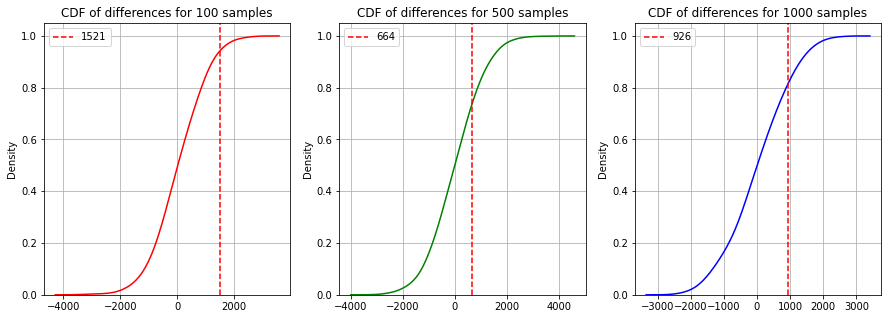

In [ ]:
colrs = ['r','g','b','y', 'c', 'm', 'k']
df = pd.read_csv('train.csv')
data_female = np.array(df[df['Gender']=='F']['Purchase'].values)
data_male = np.array(df[df['Gender']=='M']['Purchase'].values)
sample_sizes = [100, 500, 1000]
alpha = 0.15
fig, axs = plt.subplots(1, 3,figsize=(15, 5))
for j, i in enumerate(sample_sizes):
    print("For Sample Size: ", 2*i)
    
    female_sample=data_female[random.sample(range(0, data_female.shape[0]), i)]
    male_sample=data_male[random.sample(range(0, data_male.shape[0]), i)]
    
    diff_in_mean = diff_in_samples(male_sample,female_sample, "male", "female")
    
    #Step 1- Combine both samples of size 50 each to a large sample of size 100 to simulate null hypothesis
    differences = calculate_p_value(male_sample, female_sample,diff_in_mean, alpha)
    plt_cdfplot_withthreshold(j, colrs[j],differences,threshold=diff_in_mean,sample=i)

If we reject the null hypothesis, we do not prove the alternative hypothesis is true. We merely state there is sufficient evidence to reject the null hypothesis.

If we fail to reject the null hypothesis, we do not prove the null hypothesis is true. We merely state there is not sufficient evidence to reject the null hypothesis.

Unfortunately, whatever the decision, there is always a chance we made an error!

## Kolmogorov–Smirnov test:

> <h4> <font size=4 color='#339933'> A company wants know if black friday spendings of males follow a normal distribution.A sample of 30 males were asked about thier spendings and thier answers were recorded. Determine if this sample comes from normal distribution with 5% signinifance level.  </font> </h4>

KS Test can be performed for two types of problems.
1. There's the <b>one sample Kolmogorov-Smirnov test</b> for testing if a variable follows a given distribution in a population. This “given distribution” is usually -not always- the normal distribution, hence “Kolmogorov-Smirnov normality test”. 
2. There's also the <b>independent samples Kolmogorov-Smirnov test</b> for testing if a variable has identical distributions in 2 populations.

1. State the Null hypothesis that both the random variables come from same distribution
2. State the  Alternative hypothesis that both the random variables do not come from same distribution
3. Setup a confidence interval value
4. Calculate the D value using following formula $D_n,_m=Maximum|F_n(X)−F_m(X)|$
5. The null hypothesis is rejected at level $\alpha $ if $$D_{n,m} > c(\alpha) \sqrt(\frac{n+m}{nm})$$ where $c(\alpha)=\sqrt(-\frac{1}{2}log_e\alpha)$ <br> $n$,$m$ =number of points in samples.

  <h4><font color='blue'> Step 1:</font> <b>Stating Null Hypothesis and Alternate Hypothesis</b></h4>

<font color='brown'> Null Hypothesis $H_0$</font>:The black friday spendings of males follow a normal distribution.<br>
<font color='brown'> Alternative Hypothesis $H_a$</font>: The black friday spendings of males do not follow a normal distribution.

In [ ]:
# Taking one sample of size 500 from unknown disb
samples = np.array(random.sample(range(0, data_male.shape[0]), 30))
samples = (samples-samples.mean())/samples.std()

# Taking a sample of size 1000 from known disb
norm_samples=np.random.normal(loc=0.0, scale=1.0, size=30)
# norm_samples=(norm_samples-norm_samples.mean())/norm_samples.std()

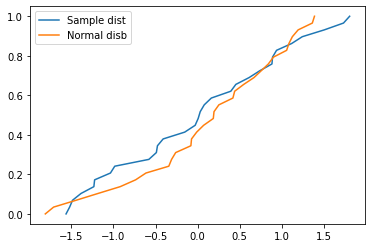

In [ ]:
sorted_data = np.sort(samples)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)


norm_sorted_data = np.sort(norm_samples)
norm_yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)

plt.plot(sorted_data,yvals,label='Sample dist')
plt.plot(norm_sorted_data,norm_yvals,label='Normal disb')

plt.legend()
plt.show()

<font color='blue'> Step 2:</font> <b>Choosing significance level</b>

 Note that the significance level is  mentioned in the problem.<font color='red'> $$\alpha=0.05 $$</font>

<font color='blue'> Step 3:</font> <b>Calculating the test statistic</b>

<ul>
    <li>Here the test statistic we are dealing with is $D_N,_M$</li>
    <li> $D_N,_M$ is maximum distance between CDF of two distributions 
</ul>

In [ ]:
#https://github.com/scipy/scipy/blob/v0.14.0/scipy/stats/stats.py#L3809
#sorting the data
data1 = np.sort(samples)
data2 = np.sort(norm_samples)
#storing the length of data
n1 = data1.shape[0]
n2 = data2.shape[0]
data_all = np.concatenate([data1, data2])
#calculating cdf
cdf1 = np.searchsorted(data1, data_all, side='right') / n1
cdf2 = np.searchsorted(data2, data_all, side='right') / n2
# d=max(abs(cdf1-cdf2))
d = np.max(np.absolute(cdf1 - cdf2))

In [ ]:
print('The test statictic d=',d)

The test statictic d= 0.16666666666666669


<h4> Calculating test statistic using scipy.stats api </h4>

In [ ]:
from scipy.stats import ks_2samp
d,p=ks_2samp(norm_samples,samples)

In [ ]:
print('The D value when calculated using scipy.stats api is',d ,'which is exactly equal to value we got')
print('Corresponding P value for the D is ',p)

The D value when calculated using scipy.stats api is 0.16666666666666666 which is exactly equal to value we got
Corresponding P value for the D is  0.8079631540901643


<font color='blue'> Step 4:</font> <b>Comparing P value with Significance level</b>

<font> We can clearly observe that P value <font color='red'>0.80 > 0.05</font> and hence we <b>fail to reject the null </b> hypothesis $H_0$ that both the first sample come from normal distribution </font>

## T-test

#### One-sampled T-test

In [16]:
from scipy.stats import ttest_1samp
import numpy as np

ages = [32,34,29,22,39,38,37,38,36,30,27,22,22]
print(ages)
ages_mean = np.mean(ages)
print(ages_mean)
tset, pval = ttest_1samp(ages, 30)
print("p-values",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

[32, 34, 29, 22, 39, 38, 37, 38, 36, 30, 27, 22, 22]
31.23076923076923
p-values 0.5033067897301606
we are accepting null hypothesis


#### Two-Sampled T-test

In [24]:
from scipy.stats import ttest_ind
import numpy as np

bp = pd.read_csv("blood_pressure.csv")
bpbefore = list(bp["bp_before"])
bpafter = list(bp["bp_after"])
week1_mean = np.mean(bpbefore)
week2_mean = np.mean(bpafter)
print("bp_before mean value:",week1_mean)
print("bp_after mean value:",week2_mean)
week1_std = np.std(bpbefore)
week2_std = np.std(bpafter)
print("bp_before std value:",week1_std)
print("bp_after std value:",week2_std)
ttest,pval = ttest_ind(bpbefore,bpafter)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

bp_before mean value: 156.45
bp_after mean value: 151.35833333333332
bp_before std value: 11.342288128944706
bp_after std value: 14.118425215141935
p-value 0.002412277478078891
we reject null hypothesis


#### Paired-sampled T-test

In [25]:
import pandas as pd
from scipy import stats
df = pd.read_csv("blood_pressure.csv")
df[['bp_before','bp_after']].describe()
ttest,pval = stats.ttest_rel(df['bp_before'], df['bp_after'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0011297914644840823
reject null hypothesis


## Z-test

#### One-sample z-test

In [26]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
df = pd.read_csv("blood_pressure.csv")
ztest ,pval = stests.ztest(df['bp_before'], x2=None, value=156)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.6651614730255063
accept null hypothesis


Two-sample z-test

In [27]:
ztest ,pval1 = stests.ztest(df['bp_before'], x2=df['bp_after'], value=0,alternative='two-sided')
print(float(pval1))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.002162306611369422
accept null hypothesis


## ANOVA (F-TEST)

#### One Way F-test(Anova)

In [28]:
df_anova = pd.read_csv('PlantGrowth.csv')
df_anova = df_anova[['weight','group']]
grps = pd.unique(df_anova.group.values)
d_data = {grp:df_anova['weight'][df_anova.group == grp] for grp in grps}
 
F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.0159099583256229
reject null hypothesis


#### Two Way F-test

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
df_anova2 = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/crop_yield.csv")
model = ols('Yield ~ C(Fert)*C(Water)', df_anova2).fit()
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
res = sm.stats.anova_lm(model, typ= 2)
res

Overall model F( 3, 16) =  4.112, p =  0.0243


,sum_sq,df,F,PR(>F)
C(Fert),69.192,1.0,5.766000,0.028847
C(Water),63.368,1.0,5.280667,0.035386
C(Fert):C(Water),15.488,1.0,1.290667,0.272656
Residual,192.000,16.0,NaN,NaN


## Chi-squared test

In [30]:
df_chi = pd.read_csv('chi-test.csv')
contingency_table=pd.crosstab(df_chi["Gender"],df_chi["Like Shopping?"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 Like Shopping?  No  Yes
Gender                 
Female           2    3
Male             2    2


In [31]:
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[2 3]
 [2 2]]


In [32]:
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[2.22222222 2.77777778]
 [1.77777778 2.22222222]]


In [35]:
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df11=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df11)
alpha = 0.05

Degree of Freedom:- 1


In [36]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.09000000000000008


In [37]:
critical_value=chi2.ppf(q=1-alpha,df=df11)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [38]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df11)
print('p-value:',p_value)

p-value: 0.7641771556220945


In [39]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',df11)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 0.09000000000000008
critical_value: 3.841458820694124
p-value: 0.7641771556220945


In [40]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
